In [9]:
# Libraries
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import f_oneway



pd.set_option('display.max_rows', None)

In [10]:
%store -r parameter_9
%store -r hospitals_personalInfo

In [11]:
#parameter_4
my_parameter = parameter_9

In [12]:
# Relative frequences for answers of every question

relative_frequencies = my_parameter.apply(lambda x: x.value_counts(normalize=True))
relative_frequencies

,2. Υπάρχει ελλιπής συντονισμός μεταξύ των Μονάδων.,4. Υπάρχει καλή συνεργασία ανάμεσα στις Μονάδες όταν αυτό απαιτείται.,6. Η συνεργασία με το προσωπικό άλλων Μονάδων είναι συχνά δυσάρεστη.,10. Οι Μονάδες συνεργάζονται καλά μεταξύ τους για την παροχή άριστης ποιοτικά φροντίδας υγείας στον ασθενή.
1.0,0.078838,0.016598,0.025000,0.016667
2.0,0.261411,0.112033,0.154167,0.112500
3.0,0.331950,0.273859,0.304167,0.350000
4.0,0.265560,0.452282,0.379167,0.379167
5.0,0.062241,0.145228,0.137500,0.141667


/var/folders/q9/jvtr2p8s6sn6wt933mh1tyfm0000gn/T/ipykernel_52755/2184165003.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


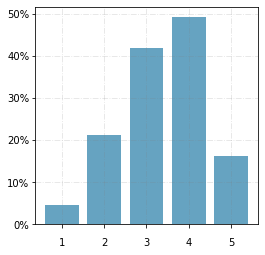

In [13]:
relative_frequencies_sum = relative_frequencies.sum(axis=1)/3
height = relative_frequencies_sum

bars = ('1', '2', '3', '4', '5')


# Figure Size
fig, ax= plt.subplots(figsize =(4, 4))


# Horizontal Bar Plot
ax.bar(bars, height,color=(0.0, 0.4, 0.6, 0.6))
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.9,
        alpha = 0.2)

    # Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 10)
ax.yaxis.set_tick_params(pad = 2)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.savefig('distribution.png')

plt.show()

In [14]:
height

1.0    0.045701
2.0    0.213370
3.0    0.419992
4.0    0.492059
5.0    0.162212
dtype: float64

In [15]:
my_parameter.describe()

,2. Υπάρχει ελλιπής συντονισμός μεταξύ των Μονάδων.,4. Υπάρχει καλή συνεργασία ανάμεσα στις Μονάδες όταν αυτό απαιτείται.,6. Η συνεργασία με το προσωπικό άλλων Μονάδων είναι συχνά δυσάρεστη.,10. Οι Μονάδες συνεργάζονται καλά μεταξύ τους για την παροχή άριστης ποιοτικά φροντίδας υγείας στον ασθενή.
count,241.000000,241.000000,240.00000,240.000000
mean,2.970954,3.597510,3.45000,3.516667
std,1.046416,0.926369,0.99244,0.928249
min,1.000000,1.000000,1.00000,1.000000
25%,2.000000,3.000000,3.00000,3.000000
50%,3.000000,4.000000,4.00000,4.000000
75%,4.000000,4.000000,4.00000,4.000000
max,5.000000,5.000000,5.00000,5.000000


# Correlation Analysis

In [16]:
# individual score to parameter 

parameter = my_parameter

individualScore = parameter.sum(axis=1)/4


In [17]:
individualScore.describe()

count    244.000000
mean       3.335041
std        0.852068
min        0.000000
25%        2.750000
50%        3.250000
75%        4.000000
max        5.000000
dtype: float64

### Gender correlation

In [18]:
gender = hospitals_personalInfo['1. Φύλο: ']

In [19]:
# create a frame with gender and score
gender = pd.concat([gender,individualScore],axis=1)

gender = gender.dropna()

gender.columns = ['Gender','Score']

male = []
female = []


#create table for every category
for index, row in gender.iterrows(): 
    if row['Gender'] == 'Γυναίκα':
        female.append(row['Score'])
    else:
        male.append(row['Score'])
        

In [20]:
from statistics import mean, pvariance
avg1 = mean(male)
var1 = pvariance(male)
avg2 = mean(female)
var2 = pvariance(female)

print("avg male =", avg1,"var male =",var1,"avg female =", avg2,"var female =",var2 )

avg male = 3.140845070422535 var male = 0.4572753421940091 avg female = 3.4541420118343193 var female = 0.6868763348622247


In [21]:
tStat, pValue = stats.ttest_ind(female, male, equal_var = False) #run independent sample T-Test
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat)) #print the

P-Value:0.0027670911973652784 T-Statistic:3.0399912695589064


In [22]:
#create table for every category

# for index, row in gender.iterrows(): 
#     if row['Gender'] == 'Γυναίκα':
#         gender["Gender"].loc[index] = 0
#     elif row['Gender'] == 'Άνδρας':
#         gender["Gender"].loc[index] = 1

    

### Age Correlation

In [23]:
age = hospitals_personalInfo['2. Ηλικία…']

In [24]:
# create a frame with age and score
age = pd.concat([age,individualScore],axis=1)
age.columns = ['Age','Score']
age = age.dropna()

In [25]:
# remove outliers
q = age['Age'].quantile(0.99)
age = age[age['Age'] < q]

In [26]:

x = age['Age']
y = age['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))



(corr,p-val) = (0.1276185310614892, 0.05326133186961466)


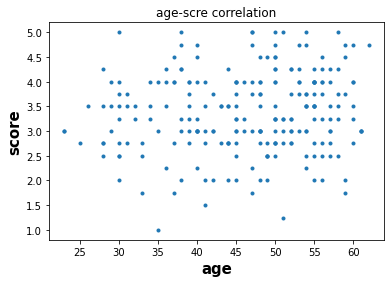

In [27]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Proffesion correlation

In [28]:
profession = hospitals_personalInfo['10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;']

profession= pd.concat([profession,individualScore],axis=1)

profession.columns = ['Profession','Score']

profession = profession.dropna()

In [29]:
print("Mean")
profession.groupby('Profession')['Score'].mean()

Mean


Profession
1. Ειδικευόμενος ιατρός    2.990741
2. Ειδικός ιατρός          3.065789
3. ΠΕ Νοσηλευτής           3.411765
4. ΤΕ Νοσηλευτής           3.488806
5. ΔΕ Βοηθός Νοσηλευτή     3.647059
Name: Score, dtype: float64

In [30]:
print("Variance")
profession.groupby('Profession')['Score'].var()

Variance


Profession
1. Ειδικευόμενος ιατρός    0.632123
2. Ειδικός ιατρός          0.505690
3. ΠΕ Νοσηλευτής           0.483915
4. ΤΕ Νοσηλευτής           0.587280
5. ΔΕ Βοηθός Νοσηλευτή     1.211397
Name: Score, dtype: float64

In [31]:
eidikevomenos_iatros = []
eidikos_iatros = []
pe_nosileftis = []
te_nosileftis = []
de_voithos_nosilefti = []

#create table for every category of profession
for index, row in profession.iterrows(): 
    if row['Profession'] == '1. Ειδικευόμενος ιατρός':
        eidikevomenos_iatros.append(row['Score'])
    elif row['Profession'] == '2. Ειδικός ιατρός':
        eidikos_iatros.append(row['Score'])
    elif row['Profession'] == '3. ΠΕ Νοσηλευτής':
        pe_nosileftis.append(row['Score'])
    elif row['Profession'] == '4. ΤΕ Νοσηλευτής':
        te_nosileftis.append(row['Score'])
    else:
        de_voithos_nosilefti.append(row['Score'])
        


In [32]:
f_oneway(eidikevomenos_iatros, eidikos_iatros, pe_nosileftis,te_nosileftis,de_voithos_nosilefti)

F_onewayResult(statistic=4.314366909373632, pvalue=0.002202518786436168)

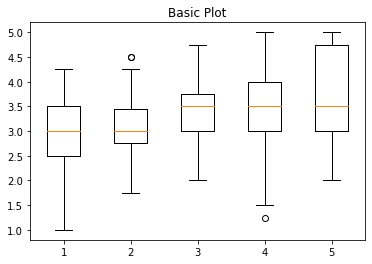

In [33]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([eidikevomenos_iatros,eidikos_iatros,pe_nosileftis,te_nosileftis,de_voithos_nosilefti])

plt.show()



### Education Correlation

In [34]:
education = hospitals_personalInfo['3α. Ποια είναι η βασική σας εκπαίδευση;']

education= pd.concat([education,individualScore],axis=1)

education.columns = ['Education','Score']

education = education.dropna()

In [35]:
print("Mean")
education.groupby('Education')['Score'].mean()

Mean


Education
1. Δευτεροβάθμια (Δ.Ε.)     3.750000
2. Τεχνολογική (Τ.Ε.)       3.485612
3. Πανεπιστημιακή (Π.Ε.)    3.102410
Name: Score, dtype: float64

In [36]:
print("Variance")
education.groupby('Education')['Score'].var()

Variance


Education
1. Δευτεροβάθμια (Δ.Ε.)     1.178571
2. Τεχνολογική (Τ.Ε.)       0.585842
3. Πανεπιστημιακή (Π.Ε.)    0.533592
Name: Score, dtype: float64

In [37]:
defterovathmia = []
texnologiki = []
panepistimiaki = []


#create table for every category of profession
for index, row in education.iterrows(): 
    if row['Education'] == '1. Δευτεροβάθμια (Δ.Ε.)':
        defterovathmia.append(row['Score'])
    elif row['Education'] == '2. Τεχνολογική (Τ.Ε.)':
        texnologiki.append(row['Score'])
    elif row['Education'] == '3. Πανεπιστημιακή (Π.Ε.)':
        panepistimiaki.append(row['Score'])

        

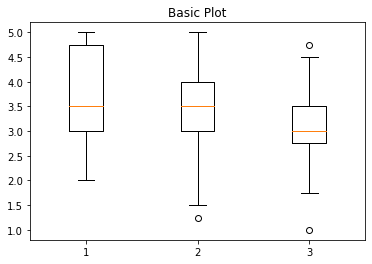

In [38]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')
ax1.boxplot([defterovathmia,texnologiki,panepistimiaki])

plt.show()

In [39]:
f_oneway(defterovathmia,texnologiki,panepistimiaki)

F_onewayResult(statistic=8.263956009683119, pvalue=0.0003404782776467161)

### Adverse Event

In [40]:
aevent = hospitals_personalInfo['Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό)']

In [41]:
# create a frame with age and score
aevent = pd.concat([aevent,individualScore],axis=1)
aevent.columns = ['aevent','Score']
aevent = aevent.dropna()

In [42]:
# remove outliers
q = aevent['aevent'].quantile(0.99)
aevent = aevent[aevent['aevent'] < q]

In [43]:

x = aevent['aevent']
y = aevent['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))


(corr,p-val) = (-0.19842854480047012, 0.004641687501548645)


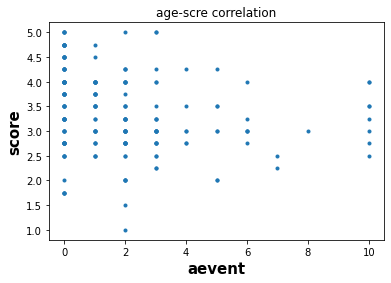

In [44]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("aevent",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Years of work in the team

In [45]:
wyears = hospitals_personalInfo['8. Πόσο χρονικό διάστημα εργάζεστε στη συγκεκριμένη μονάδα ?']

In [46]:
# create a frame with years and score
wyears = pd.concat([wyears,individualScore],axis=1)
wyears.columns = ['wyears','Score']
wyears = wyears.dropna()



In [47]:
# remove outlie
q = wyears['wyears'].quantile(0.99)
wyears = wyears[wyears['wyears'] < q]

In [48]:
x = wyears['wyears']
y = wyears['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (0.08641626942431478, 0.19755942574262012)


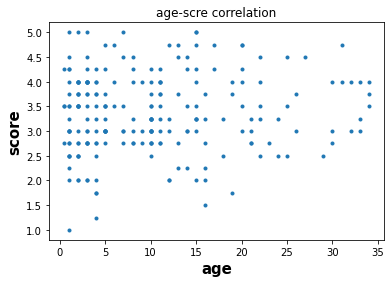

In [49]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Years of work in the hospital


In [50]:
wyears = hospitals_personalInfo['7. Πόσο χρονικό διάστημα εργάζεστε στο συγκεκριμένο Νοσοκομείο;']

In [51]:
# create a frame with years and score
wyears = pd.concat([wyears,individualScore],axis=1)
wyears.columns = ['wyears','Score']
wyears = wyears.dropna()



In [52]:
# remove outliers
q = wyears['wyears'].quantile(0.99)
wyears = wyears[wyears['wyears'] < q]

In [53]:
x = wyears['wyears']
y = wyears['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (0.25547765950867074, 8.291522128451984e-05)


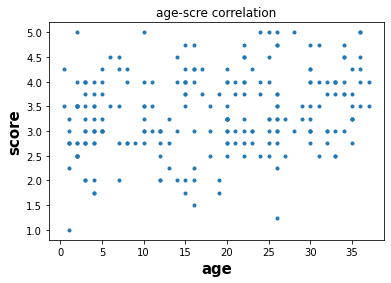

In [54]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

### Hours of Work in the hopital

In [55]:
whours = hospitals_personalInfo['9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …']

In [56]:
# create a frame with hours and score
whours = pd.concat([whours,individualScore],axis=1)
whours.columns = ['whours','Score']
whours = whours.dropna()


In [57]:
# remove outliers
q = whours['whours'].quantile(0.99)
whours = whours[whours['whours'] < q]

In [58]:
x = wyears['wyears']
y = wyears['Score']
#calculation correlation coefficient and p-value between x and y
print("(corr,p-val) =",pearsonr(x, y))

(corr,p-val) = (0.25547765950867074, 8.291522128451984e-05)


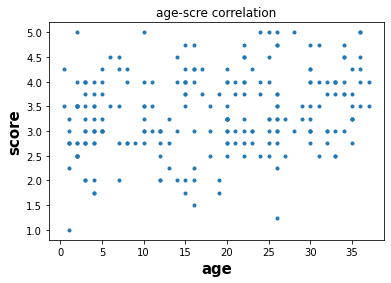

In [59]:
plt.plot(x, y, '.')
plt.title("age-scre correlation")
plt.xlabel("age",fontweight="bold", fontsize="15")
plt.ylabel("score",fontweight="bold", fontsize="15")

plt.show()

## Multivariant linear Regression for score and variables with evidece of correlation

In [60]:
hospitals_personalInfo

,Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό),1. Φύλο:,2. Ηλικία…,3α. Ποια είναι η βασική σας εκπαίδευση;,3β. Άλλες σπουδές:,7. Πόσο χρονικό διάστημα εργάζεστε στο συγκεκριμένο Νοσοκομείο;,8. Πόσο χρονικό διάστημα εργάζεστε στη συγκεκριμένη μονάδα ?,9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …,10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;
0,4.0,Γυναίκα,23.0,3. Πανεπιστημιακή (Π.Ε.),3. Διδακτορικό δίπλωμα,23.0,12.0,23.0,4. ΤΕ Νοσηλευτής
1,NaN,Γυναίκα,45.0,3. Πανεπιστημιακή (Π.Ε.),2. Μεταπτυχιακές σπουδές,23.0,NaN,12.0,4. ΤΕ Νοσηλευτής
2,10.0,Άνδρας,55.0,2. Τεχνολογική (Τ.Ε.),3. Διδακτορικό δίπλωμα,33.0,3.0,60.0,4. ΤΕ Νοσηλευτής
3,NaN,Άνδρας,61.0,3. Πανεπιστημιακή (Π.Ε.),3. Διδακτορικό δίπλωμα,30.0,30.0,NaN,NaN
4,2.0,Άνδρας,50.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,25.0,11.0,41.0,4. ΤΕ Νοσηλευτής
5,NaN,Γυναίκα,48.0,3. Πανεπιστημιακή (Π.Ε.),2. Μεταπτυχιακές σπουδές,15.0,15.0,52.0,2. Ειδικός ιατρός
6,6.0,Άνδρας,55.0,2. Τεχνολογική (Τ.Ε.),3. Διδακτορικό δίπλωμα,33.0,11.0,40.0,4. ΤΕ Νοσηλευτής
7,NaN,Γυναίκα,39.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,10.0,9.0,40.0,4. ΤΕ Νοσηλευτής
8,NaN,Γυναίκα,40.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,14.0,2.0,50.0,4. ΤΕ Νοσηλευτής
9,NaN,Γυναίκα,55.0,2. Τεχνολογική (Τ.Ε.),2. Μεταπτυχιακές σπουδές,26.0,3.0,45.0,4. ΤΕ Νοσηλευτής


In [61]:
data = hospitals_personalInfo[['1. Φύλο: ','2. Ηλικία…','Τους τελευταίους 12 μήνες πόσα δυσμενή συμβάντα έχετε αναφέρει; (Αναφέρετε έναν αριθμό)','7. Πόσο χρονικό διάστημα εργάζεστε στο συγκεκριμένο Νοσοκομείο;','10. Τι θέση κατέχετε στο νοσοκομείο που εργάζεστε;','9. Συνήθως πόσες ώρες την εβδομάδα εργάζεστε στο συγκεκριμένο Νοσοκομείο; …']]
data = pd.concat((data, individualScore), axis=1)
data.columns = ['gender','age','aevent','yearsHospital','position','hours','score']


In [62]:
#clean data
data = data.dropna()
data

,gender,age,aevent,yearsHospital,position,hours,score
0,Γυναίκα,23.0,4.0,23.0,4. ΤΕ Νοσηλευτής,23.0,3.00
2,Άνδρας,55.0,10.0,33.0,4. ΤΕ Νοσηλευτής,60.0,4.00
4,Άνδρας,50.0,2.0,25.0,4. ΤΕ Νοσηλευτής,41.0,2.75
6,Άνδρας,55.0,6.0,33.0,4. ΤΕ Νοσηλευτής,40.0,4.00
12,Άνδρας,51.0,2.0,25.0,4. ΤΕ Νοσηλευτής,40.0,3.00
13,Γυναίκα,54.0,2.0,30.0,4. ΤΕ Νοσηλευτής,40.0,3.00
14,Γυναίκα,57.0,2.0,35.0,4. ΤΕ Νοσηλευτής,40.0,3.50
15,Γυναίκα,52.0,3.0,20.0,3. ΠΕ Νοσηλευτής,40.0,3.25
17,Άνδρας,50.0,3.0,30.0,4. ΤΕ Νοσηλευτής,40.0,3.50
18,Άνδρας,53.0,10.0,30.0,4. ΤΕ Νοσηλευτής,60.0,4.00


In [63]:
#remove outliers
q1 = data['aevent'].quantile(0.99)
data = data.loc[data['aevent'] < q1]

q2 = data['yearsHospital'].quantile(0.99)
data = data.loc[data['yearsHospital'] < q2]

q3 = data['hours'].quantile(0.99)
data = data.loc[data['hours'] < q2]

print(q3)

75.0


In [64]:
#make categorical values binary

dummies = pd.get_dummies(data['gender'])
data = pd.concat((data, dummies), axis=1)

dummies = pd.get_dummies(data['position'])
data = pd.concat((data, dummies), axis=1)


In [65]:
data

,gender,age,aevent,yearsHospital,position,hours,score,Άνδρας,Γυναίκα,1. Ειδικευόμενος ιατρός,2. Ειδικός ιατρός,4. ΤΕ Νοσηλευτής,5. ΔΕ Βοηθός Νοσηλευτή
0,Γυναίκα,23.0,4.0,23.0,4. ΤΕ Νοσηλευτής,23.0,3.00,0,1,0,0,1,0
26,Γυναίκα,48.0,0.0,15.0,4. ΤΕ Νοσηλευτής,7.0,4.00,0,1,0,0,1,0
50,Γυναίκα,40.0,1.0,12.0,4. ΤΕ Νοσηλευτής,25.0,3.00,0,1,0,0,1,0
96,Γυναίκα,46.0,6.0,10.0,2. Ειδικός ιατρός,35.0,3.00,0,1,0,1,0,0
103,Γυναίκα,38.0,2.0,10.0,4. ΤΕ Νοσηλευτής,8.0,3.25,0,1,0,0,1,0
129,Άνδρας,51.0,1.0,27.0,4. ΤΕ Νοσηλευτής,24.0,3.25,1,0,0,0,1,0
142,Γυναίκα,35.0,2.0,1.0,1. Ειδικευόμενος ιατρός,10.0,1.00,0,1,1,0,0,0
150,Γυναίκα,45.0,2.0,9.0,2. Ειδικός ιατρός,36.0,2.75,0,1,0,1,0,0
154,Γυναίκα,37.0,0.0,7.0,2. Ειδικός ιατρός,16.0,4.50,0,1,0,1,0,0
164,Άνδρας,30.0,2.0,4.0,1. Ειδικευόμενος ιατρός,35.0,2.00,1,0,1,0,0,0


In [66]:
# build model
X = data[['age','Άνδρας','aevent','1. Ειδικευόμενος ιατρός','hours']]
y = data['score']

In [67]:
#ols model
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     7.004
Date:                Fri, 23 Dec 2022   Prob (F-statistic):            0.00280
Time:                        11:02:45   Log-Likelihood:                -9.2309
No. Observations:                  18   AIC:                             30.46
Df Residuals:                      12   BIC:                             35.80
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

/Users/stathis/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
